# Figure 4

## a

In [85]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from flyvis import EnsembleView
from flyvis.analysis.visualization import plots
from flyvis.analysis.visualization import plt_utils
from flyvis.analysis.moving_bar_responses import plot_angular_tuning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
ensemble = EnsembleView(
    "flow/0000",
    best_checkpoint_fn_kwargs={
        "validation_subdir": "validation",
        "loss_file_name": "loss",
    },
)

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2025-07-22 20:51:08] ensemble:166 Loaded 50 networks.


In [206]:
T4__CELL_TYPE = "T4"
T5__CELL_TYPE = "T5"
CELL_TYPE = "T5d"
if CELL_TYPE.startswith(T4__CELL_TYPE):
    INTENSITY = 1
elif CELL_TYPE.startswith(T5__CELL_TYPE):
    INTENSITY = 0
else:
    raise ValueError(f"Unaccounted for cell type {CELL_TYPE}")

In [207]:
r = ensemble.moving_edge_responses()

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f5f7ab0e86eec6a74f7c7348ff271874/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e4bde032c338b1cd29735e20d7295560/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/205d5ca11f565fb4051fa31c35611447/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5c6c920ba6d8823e0ecde6bebde9038d/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/6dff21380290115f37d551ec4e3fb63c/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses

In [208]:
r['responses'] /= (norm := ensemble.responses_norm(rectified=True))

In [209]:
# retrieve cluster indices for averaging across best clusters
cell_types = [
    "L1",
    "L2",
    "L3",
    "L4",
    "L5",
    "Mi1",
    "Tm3",
    "Mi4",
    "Mi9",
    "CT1(M10)",
    "T4a",
    "T4b",
    "T4c",
    "T4d",
    "T5a",
    "T5b",
    "T5c",
    "T5d",
    "Tm1",
    "Tm2",
    "Tm4",
    "Tm9",
    "CT1(Lo1)",
    "TmY3",
]
cluster_indices = {}
for cell_type in cell_types:
    if cell_type not in cluster_indices:
        cluster_indices[cell_type] = ensemble.cluster_indices(cell_type)

/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator GaussianMixture from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[2025-07-22 21:44:15] clustering:835 Loaded L1 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/

[2025-07-22 21:44:15] clustering:835 Loaded L2 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/umap_and_clustering
[2025-07-22 21:44:15] clustering:835 Loaded L3 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/umap_and_clustering
[2025-07-22 21:44:15] clustering:835 Loaded L4 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/umap_and_clustering
[2025-07-22 21:44:15] clustering:835 Loaded L5 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/umap_and_clustering
[2025-07-22 21:44:15] clustering:835 Loaded Mi1 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/umap_and_clustering
[2025-07-22 21:44:15] clustering:835 Loaded Tm3 embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/umap_and_clustering
[2025-07-22 21

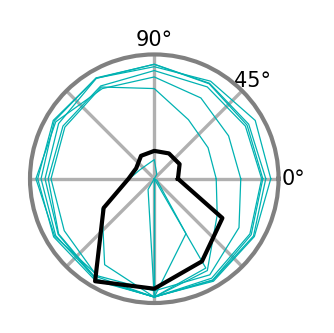

In [210]:
_ = plot_angular_tuning(
    r.sel(network_id=cluster_indices[CELL_TYPE][0]),
    CELL_TYPE,
    intensity=INTENSITY,
    linewidth=0.3,
    zorder=ensemble.zorder()[cluster_indices[CELL_TYPE][0]],
    groundtruth=True,
)

## b

In [211]:
from datamate import namespacify

from flyvis.analysis.moving_edge_currents import CellTypeArray, MovingEdgeCurrentView
from flyvis.datasets import MovingEdge

In [212]:
target_types = [CELL_TYPE]

In [213]:
experiment_data = ensemble.moving_edge_currents()

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/ab88142ab4c97bf6817283ee1cbc3069/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/114b5ff2800c39fd72c9cab366884d09/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/5f88dc8aa54e6f4b774b2008d1acd70e/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/07cb652410a1c74aa4b46b68cecfe8b7/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses_currents/compute_currents/97a4efda83d24520bfd20206a8ef30a8/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__ca

In [214]:
dataset = MovingEdge(**experiment_data[0].config)

In [215]:
current_views = {}

In [216]:
norm = CellTypeArray(ensemble.responses_norm(rectified=False), ensemble[0].connectome)

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ec002177245ed30fe68c68017bbc5281/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f3550b17c98a072ee24344e7d80a9dff/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/78cf6416086eca223c20eb5bd33f9baa/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/cc0d06353e19b7a29c816236472dd532/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/7a84d2a060949a51ac30f04b78a200cb/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses

In [217]:
for target_type in target_types:
    if target_type not in current_views:
        current_views[target_type] = MovingEdgeCurrentView(
            ensemble, target_type, experiment_data, dataset.arg_df
        )
    view = current_views[target_type]

In [218]:
for target_type in target_types:
    current_views[target_type] = view.divide_by_given_norm(norm)

In [219]:
current_view = current_views[CELL_TYPE]

Text(0.5, 0, 'time (s)')

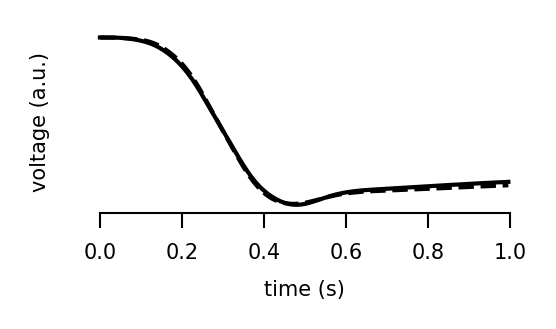

In [220]:
fig, ax = current_view.model_selection(cluster_indices[CELL_TYPE][0]).plot_response(
    1, 90, t_end=1.0
)
xlim_responses = ax.get_xlim()
ax.set_ylabel("voltage (a.u.)", fontsize=5)
ax.set_xlabel("time (s)", fontsize=5)

Text(0, 0.5, 'current (a.u.)')

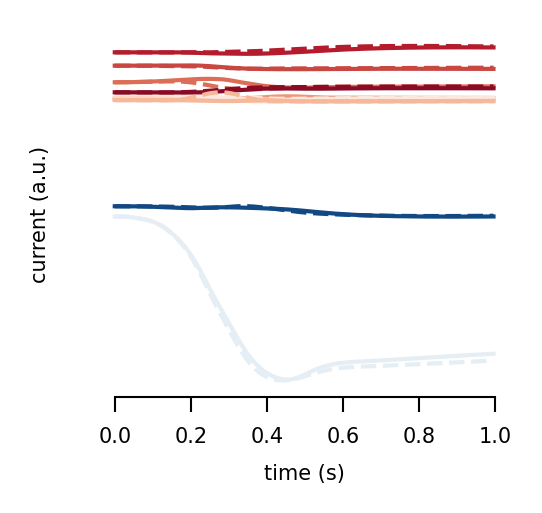

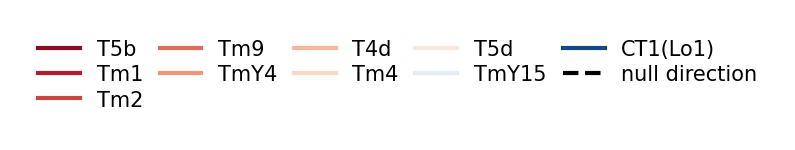

In [221]:
fig, ax, legend_fig, legend_ax = current_view.model_selection(
    cluster_indices[CELL_TYPE][0]
).plot_temporal_contributions(
    1,
    90,
    t_start=0,
    t_end=1,
    model_average=True,
    legend=False,
    sum_exc_inh=False,
    only_sum=False,
    max_figure_height_cm=3.3941,
    panel_height_cm=3.3941,
    max_figure_width_cm=4.0513,
    panel_width_cm=4.0513,
    hide_source_types=None,
)
ylim = ax.get_ylim()
ax.set_ylabel("current (a.u.)", fontsize=5)

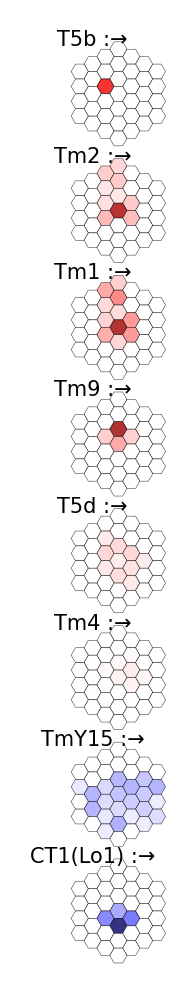

In [222]:
fig, ax, _ = current_view.model_selection(
    cluster_indices[CELL_TYPE][0]
).plot_spatial_contribution_grid(
    t_start=0,
    t_end=1,
)